<a href="https://colab.research.google.com/github/mimiachiu/Deep-Learning-with-Python-Book/blob/master/Ch03_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
pip install keras

In [3]:
from keras.datasets import imdb #從keras匯入IMDB電影評論資料集
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #載入資料並分成訓練和測試，imdb已有建立好的字典並按照常用度排列，num_words參數是指載入最常用的單字個數

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [4]:
train_data #有兩層list，內層的每個list代表一則評論，裡面的數字對應到的是字典裡的編號

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
train_labels #1代表正面評論，0代表負面評論

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
#可以用以下程式將數字還原成英文單字
word_index = imdb.get_word_index() #載入單字對應數字的字典
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #轉換為數字對應單字的字典
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #將第一筆評論的所有數字轉換成英文單字，i-3是因為0~2有特殊用途

1646592/1641221 [==============================] - 1s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np
#把資料轉換成One-hot編碼
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
#轉換後變成10000維的資料
print(x_train.shape)
print(x_train)

(25000, 10000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
#轉換成ndarray格式
print(y_train.shape)
print(y_train)

(25000,)
[1. 0. 0. ... 0. 1. 0.]


In [13]:
#設定驗證資料集與訓練資料集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
#建立模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
#開始訓練，fit會回傳一個字典，裡面記錄訓練過程的資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 189us/step - loss: 0.5097 - accuracy: 0.7881 - val_loss: 0.3847 - val_accuracy: 0.8756
Epoch 2/4
15000/15000 [==============================] - 1s 71us/step - loss: 0.3071 - accuracy: 0.9036 - val_loss: 0.3091 - val_accuracy: 0.8868
Epoch 3/4
15000/15000 [==============================] - 1s 71us/step - loss: 0.2257 - accuracy: 0.9268 - val_loss: 0.2864 - val_accuracy: 0.8862
Epoch 4/4
15000/15000 [==============================] - 1s 71us/step - loss: 0.1778 - accuracy: 0.9423 - val_loss: 0.2787 - val_accuracy: 0.8883


In [16]:
history.history.keys() #裡面記錄的資料

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

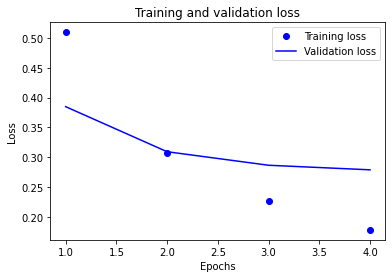

In [17]:
#繪製訓練與驗證的損失分數
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

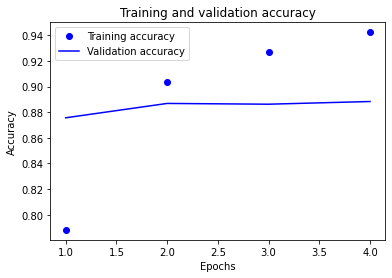

In [18]:
#繪製訓練與驗證的準確度
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
#將測試資料丟入訓練好的模型進行評估，得到損失分數和準確度
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 77us/step


[0.29386003938674926, 0.8816800117492676]